### Lectura del csv

In [136]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

In [137]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [138]:
ruta_csv = "ventas.csv"
df = pd.read_csv(ruta_csv, delimiter=',')
df.head()

,id_cliente,nombre,apellido,sexo,edad,producto,total_venta,fecha_de_compra
0,1,Maria,Gonzalez,F,28,pc,567.89,2023-01-15
1,2,Maria,Gonzalez,F,28,micro,123.45,2023-02-01
2,3,Esteban,Sanchez,M,35,notebook,789.01,2023-02-15
3,4,Esteban,Sanchez,M,35,reparacion,150.00,2023-03-01
4,5,Andrea,Martinez,F,42,ram,89.45,2023-03-15


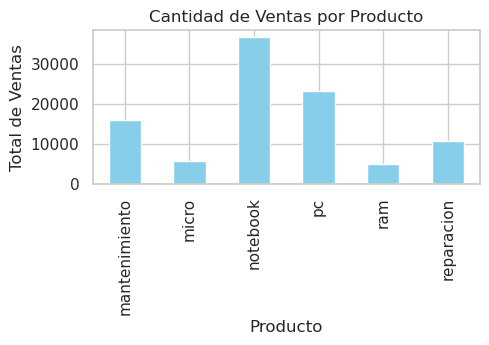

In [139]:



#obtener los productos únicos
productos_unicos = df['producto'].unique()


# Gráfico de barras para mostrar la cantidad de ventas por producto
plt.figure(figsize=(5, 2))
df.groupby('producto')['total_venta'].sum().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Total de Ventas')
plt.show()


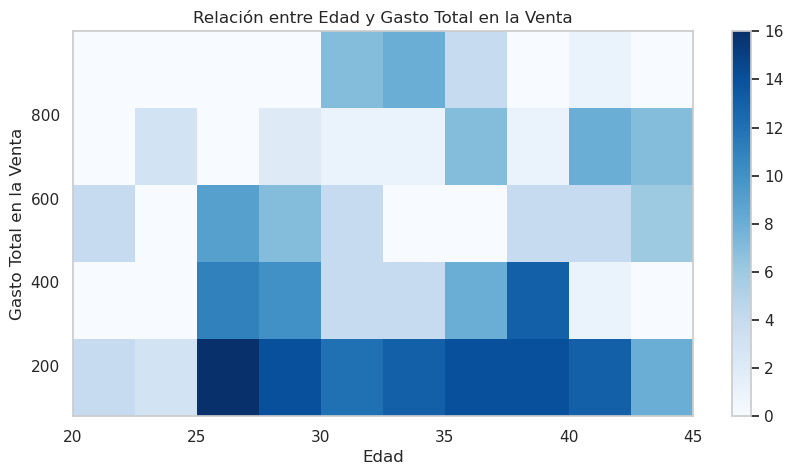

In [140]:
# Histograma para mostrar la relación entre la edad de los compradores y el gasto total en la venta
plt.figure(figsize=(10, 5))
plt.hist2d(df['edad'], df['total_venta'], bins=(10, 5), cmap='Blues')
plt.colorbar()
plt.title('Relación entre Edad y Gasto Total en la Venta')
plt.xlabel('Edad')
plt.ylabel('Gasto Total en la Venta')
plt.show()

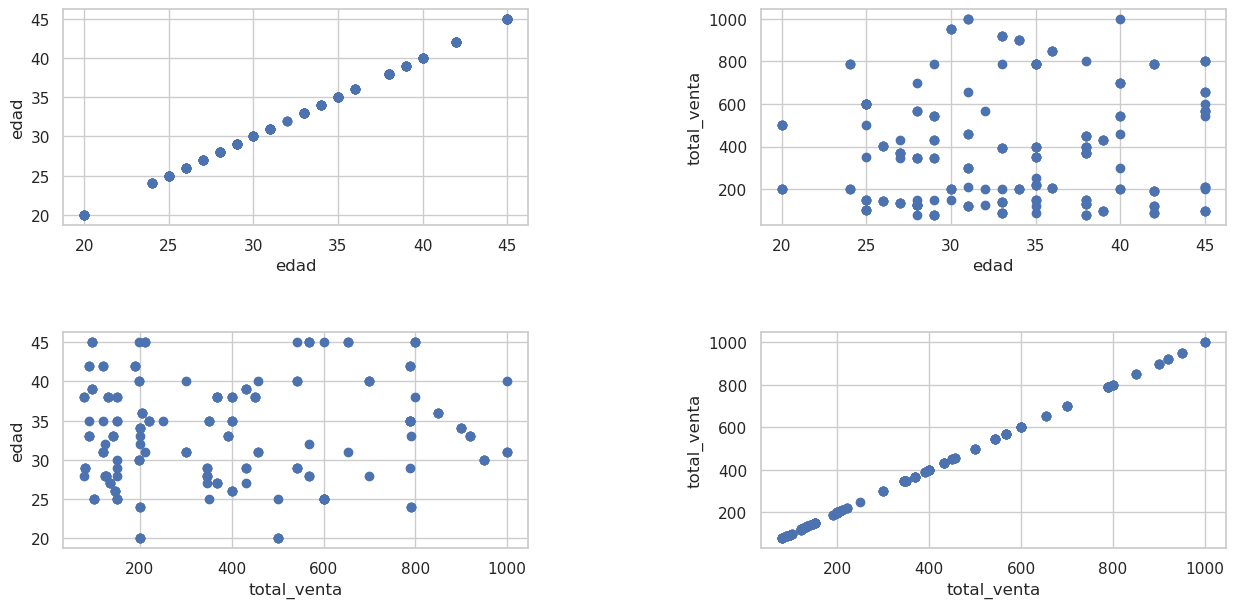

In [141]:
# Matriz de gráficos de dispersión
plt.figure(1, figsize=(15, 7))
n = 0

for x in ['edad', 'total_venta']:
    for y in ['edad', 'total_venta']:
        n += 1
        plt.subplot(2, 2, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.scatter(df[x], df[y])
        plt.xlabel(x)
        plt.ylabel(y)

plt.show()

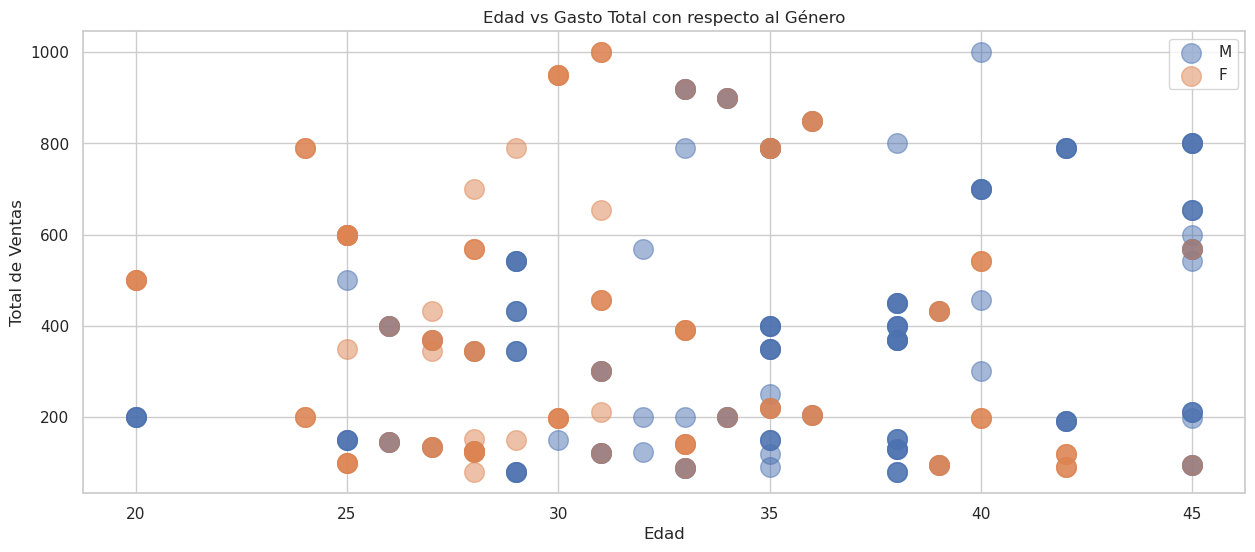

In [142]:

# Gráfico de dispersión para Age vs Annual Income w.r.t Gender
plt.figure(1, figsize=(15, 6))

for gender in ['M', 'F']:
    plt.scatter(x='edad', y='total_venta', data=df[df['sexo'] == gender],
                s=200, alpha=0.5, label=gender)

plt.xlabel('Edad'), plt.ylabel('Total de Ventas')
plt.title('Edad vs Gasto Total con respecto al Género')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

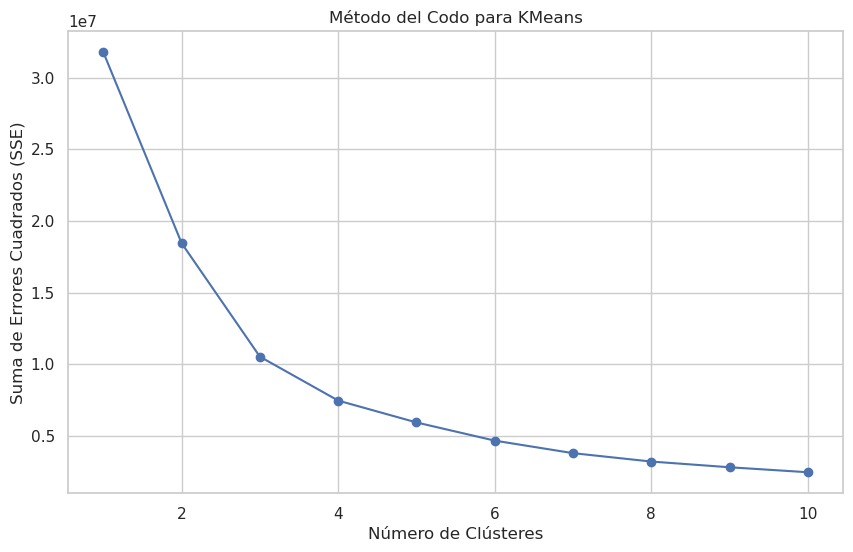

In [143]:

from sklearn.cluster import KMeans

#id_cliente	nombre	apellido	sexo	edad	producto	total_venta	fecha_de_compra

# Calcular el costo promedio
costo_promedio = df['total_venta'].mean()
# Agregar una columna indicando si la venta fue mayor al costo promedio
df['venta_mayor_al_promedio'] = df['total_venta'] > costo_promedio

# Definimos la función que aplica el algoritmo KMeans y calcula la suma de errores cuadrados para distintos números de clústeres
# Convertir la columna 'fecha_de_compra' a formato de fecha
df['fecha_de_compra'] = pd.to_datetime(df['fecha_de_compra'])

# Convertir la columna 'fecha_de_compra' a números de días desde la fecha mínima
df['fecha_de_compra_num'] = (df['fecha_de_compra'] - df['fecha_de_compra'].min()).dt.days

# Definimos la función que aplica el algoritmo KMeans y calcula la suma de errores cuadrados para distintos números de clústeres
def find_optimal_clusters_kmeans(df, max_k):
    sse = [] # Suma de errores cuadrados
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(df[['edad','venta_mayor_al_promedio', 'total_venta', 'fecha_de_compra_num']])
        sse.append(kmeans.inertia_) # Inercia: Suma de distancias de las muestras al centro de clúster más cercano

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Número de Clústeres")
    plt.ylabel("Suma de Errores Cuadrados (SSE)")
    plt.title("Método del Codo para KMeans")
    plt.grid(True)
    plt.show()

# Ejemplo de uso de la función con el DataFrame dado y buscando hasta 10 clústeres
find_optimal_clusters_kmeans(df, 10)

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


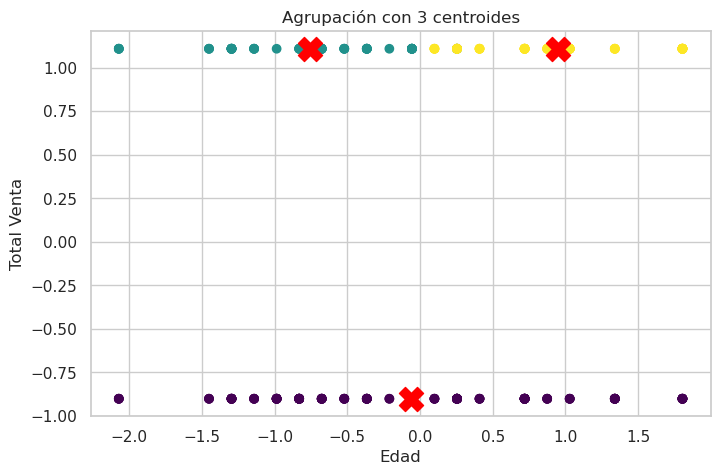

In [144]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame original

# Seleccionar las columnas numéricas para la agrupación
X = df[['edad','venta_mayor_al_promedio', 'total_venta', 'fecha_de_compra_num']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar KMeans con 3 centroides
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster_3'] = kmeans_3.fit_predict(X_scaled)

# Visualización de resultados con 3 centroides
plt.figure(figsize=(8, 5))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster_3'], cmap='viridis')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Agrupación con 3 centroides')
plt.xlabel('Edad')
plt.ylabel('Total Venta')

plt.show()


In [145]:
df

,id_cliente,nombre,apellido,sexo,edad,producto,total_venta,fecha_de_compra,venta_mayor_al_promedio,fecha_de_compra_num,cluster_3
0,1,Maria,Gonzalez,F,28,pc,567.89,2023-01-15,True,0,1
1,2,Maria,Gonzalez,F,28,micro,123.45,2023-02-01,False,17,0
2,3,Esteban,Sanchez,M,35,notebook,789.01,2023-02-15,True,31,1
3,4,Esteban,Sanchez,M,35,reparacion,150.00,2023-03-01,False,45,0
4,5,Andrea,Martinez,F,42,ram,89.45,2023-03-15,False,59,0
...,...,...,...,...,...,...,...,...,...,...,...
245,246,Juan,Pérez,M,25,micro,149.99,2025-04-10,False,816,0
246,247,María,García,F,25,notebook,599.99,2025-04-15,True,821,1
247,248,Luis,Rodríguez,M,38,reparacion,399.99,2025-04-20,True,826,2
248,249,Pedro,Sánchez,M,45,pc,799.99,2025-04-25,True,831,2


In [146]:
# Calculamos los promedios de las variables de interés para cada clúster
cluster_means = df.groupby('cluster_3')[['edad', 'venta_mayor_al_promedio', 'total_venta', 'fecha_de_compra_num']].mean()


In [147]:
sorted_indices = cluster_means.mean(axis=1).sort_values(ascending=False).index
danger_levels = {sorted_indices[0]: 'Alta',
                 sorted_indices[1]: 'Media',
                 sorted_indices[2]: 'Baja'}

In [148]:
# Añadimos una nueva columna al DataFrame con los niveles de peligrosidad
df['compra'] = df['cluster_3'].map(danger_levels)
df

,id_cliente,nombre,apellido,sexo,edad,producto,total_venta,fecha_de_compra,venta_mayor_al_promedio,fecha_de_compra_num,cluster_3,compra
0,1,Maria,Gonzalez,F,28,pc,567.89,2023-01-15,True,0,1,Media
1,2,Maria,Gonzalez,F,28,micro,123.45,2023-02-01,False,17,0,Baja
2,3,Esteban,Sanchez,M,35,notebook,789.01,2023-02-15,True,31,1,Media
3,4,Esteban,Sanchez,M,35,reparacion,150.00,2023-03-01,False,45,0,Baja
4,5,Andrea,Martinez,F,42,ram,89.45,2023-03-15,False,59,0,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Juan,Pérez,M,25,micro,149.99,2025-04-10,False,816,0,Baja
246,247,María,García,F,25,notebook,599.99,2025-04-15,True,821,1,Media
247,248,Luis,Rodríguez,M,38,reparacion,399.99,2025-04-20,True,826,2,Alta
248,249,Pedro,Sánchez,M,45,pc,799.99,2025-04-25,True,831,2,Alta


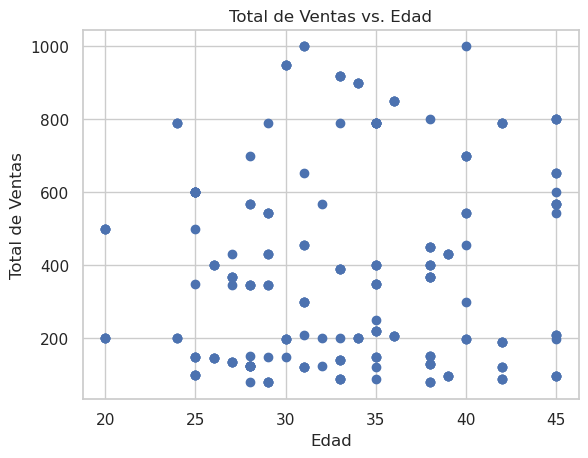

In [149]:
plt.scatter(df['edad'], df['total_venta'])
plt.title('Total de Ventas vs. Edad')
plt.xlabel('Edad')
plt.ylabel('Total de Ventas')
plt.show()

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

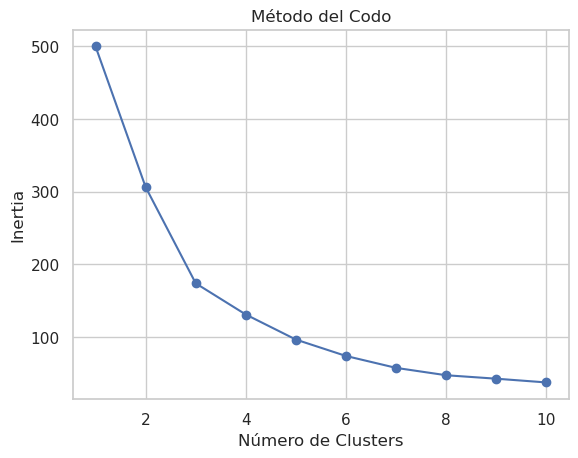

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


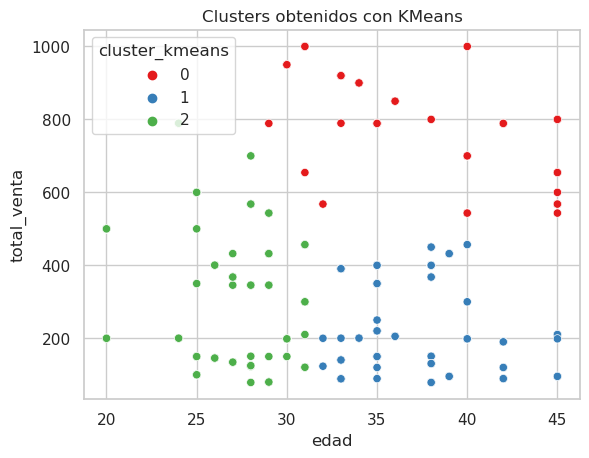

In [150]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las características relevantes para el análisis de clustering
features = ['edad', 'total_venta']

# Crear un nuevo DataFrame solo con las características seleccionadas
X = df[features]

# Estandarizar los datos para asegurar que todas las características tengan la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

# Basado en el método del codo, seleccionar un número óptimo de clusters (k)
k = 3

# Aplicar KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Visualizar los clusters en un gráfico de dispersión
sns.scatterplot(x='edad', y='total_venta', hue='cluster_kmeans', data=df, palette='Set1')
plt.title('Clusters obtenidos con KMeans')
plt.show()


In [151]:
# Crear una nueva columna para el puntaje
df['puntaje'] = 0

# Asignar puntajes basados en la cantidad de compras realizadas
df['puntaje'] += df.groupby('id_cliente')['total_venta'].transform('count') * 2  # Por ejemplo, 2 puntos por cada compra

# Asignar puntajes si la compra fue mayor al promedio
df['puntaje'] += df['venta_mayor_al_promedio'].astype(int) * 3  # Por ejemplo, 3 puntos si la compra fue mayor al promedio

# Asignar puntajes basados en el monto total gastado
df['puntaje'] += df.groupby('id_cliente')['total_venta'].transform('sum') // 100  # Por ejemplo, 1 punto por cada 100 unidades de moneda local gastadas

# Visualizar el resultado
df

,id_cliente,nombre,apellido,sexo,edad,producto,total_venta,fecha_de_compra,venta_mayor_al_promedio,fecha_de_compra_num,cluster_3,compra,cluster_kmeans,puntaje
0,1,Maria,Gonzalez,F,28,pc,567.89,2023-01-15,True,0,1,Media,2,10.0
1,2,Maria,Gonzalez,F,28,micro,123.45,2023-02-01,False,17,0,Baja,2,3.0
2,3,Esteban,Sanchez,M,35,notebook,789.01,2023-02-15,True,31,1,Media,0,12.0
3,4,Esteban,Sanchez,M,35,reparacion,150.00,2023-03-01,False,45,0,Baja,1,3.0
4,5,Andrea,Martinez,F,42,ram,89.45,2023-03-15,False,59,0,Baja,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Juan,Pérez,M,25,micro,149.99,2025-04-10,False,816,0,Baja,2,3.0
246,247,María,García,F,25,notebook,599.99,2025-04-15,True,821,1,Media,2,10.0
247,248,Luis,Rodríguez,M,38,reparacion,399.99,2025-04-20,True,826,2,Alta,1,8.0
248,249,Pedro,Sánchez,M,45,pc,799.99,2025-04-25,True,831,2,Alta,0,12.0


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Asegúrate de que la columna de fecha esté en formato de fecha
df['fecha_de_compra'] = pd.to_datetime(df['fecha_de_compra'])

# Ordena el DataFrame por fecha
df.sort_values('fecha_de_compra', inplace=True)

# Calcula la cantidad de compras por día
df['compras_diarias'] = df.groupby('fecha_de_compra')['id_cliente'].transform('count')

# Crear variables predictoras y objetivo
X = df[['compras_diarias']]
y = df['total_venta']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=3)

# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')

# Crear una nueva columna de puntaje basada en las predicciones de KNN
df['puntaje_predicho'] = knn_model.predict(df[['compras_diarias']])

# Escalar los puntajes predichos entre 0 y 100
df['puntaje_predicho'] = (df['puntaje_predicho'] - df['puntaje_predicho'].min()) / (df['puntaje_predicho'].max() - df['puntaje_predicho'].min()) * 100

# Visualizar el resultado
print(df[['id_cliente', 'nombre', 'apellido', 'fecha_de_compra', 'compras_diarias', 'total_venta', 'puntaje_predicho']])


Error Cuadrático Medio: 82359.09690577778
     id_cliente   nombre    apellido fecha_de_compra  compras_diarias  \
0             1    Maria    Gonzalez      2023-01-15                4   
50           51    Maria    Gonzalez      2023-01-15                4   
150         151     Luis    Castillo      2023-01-15                4   
100         101    Maria    Gonzalez      2023-01-15                4   
51           52    Maria    Gonzalez      2023-02-01                4   
..          ...      ...         ...             ...              ...   
245         246     Juan       Pérez      2025-04-10                1   
246         247    María      García      2025-04-15                1   
247         248     Luis   Rodríguez      2025-04-20                1   
248         249    Pedro     Sánchez      2025-04-25                1   
249         250  Ricardo     Fuentes      2025-05-01                1   

     total_venta  puntaje_predicho  
0         567.89        100.000000  
50     